## Q-Value Analysis

This notebook provides some visualization and insight into how the learning agent perceives different states in terms of their value.

In [201]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
from copy import deepcopy

Functions for parsing the log file

In [303]:
def isnumber(n):
    try:
        float(n)
    except:
        return False
    return True

def parse_logfile(path):
    games = []
    q_values = []
    count = 1
    in_game = False
    in_array = False
    
    with open(path,'r') as file:
        dot_string = ''
        q_value_game = []
        for line in file:
            if line == '' or 'is' in line:
                in_game = False
                if dot_string != '':
                    games.append(dot_string)
                dot_string = ''
            elif line[0] == '.' or in_game:
                in_game = True
                in_array = False
                dot_string += line
            elif line[0] == ',':
                in_array = True
                [q_value_game.append(float(n)) for n in line.replace(',[','').split(' ') if isnumber(n)]
            elif ']' in line:
                [q_value_game.append(float(n)) for n in line[:-1].replace(']','').split(' ') if isnumber(n)]
                q_values.append(q_value_game)
                q_value_game = []
                in_array = False
            elif in_array:
                [q_value_game.append(float(n)) for n in line.split(' ') if isnumber(n)]
                
    return games, q_values
                
            
                
            

Function for plotting the q value

In [290]:
def plot_qvals(q_vals):
    fig = plt.figure(figsize=(15,5))
    ax = fig.add_subplot(111)
    q_values = np.array(q_vals)
    colors = cm.Spectral(q_values/max(q_values))
    plot = plt.scatter(q_values, q_values, c = q_values, cmap= 'Spectral')
    plt.clf()
    plt.colorbar(plot)
    x = range(0,40)
    plt.bar(x, q_values, color = colors, align='center')
    plt.ylim(-1,1)
    plt.xlim(-.5,39.5)
    plt.xticks(np.arange(min(x), max(x)+1, 1.0))
    plt.xlabel('Output')
    plt.ylabel('Q Value')
    plt.title('Q Value by Action')
    plt.show()

Get the games and Q Values

In [291]:
games, q_vals = parse_logfile('q_log.txt')

.----.    .    .    .
               |    
.    .----.----.----.
     |    |    |    |    
.----.----.----.----.
|    |    |    |    
.----.----.----.    .
|    |    |    |    |    
.____.____.____.    .




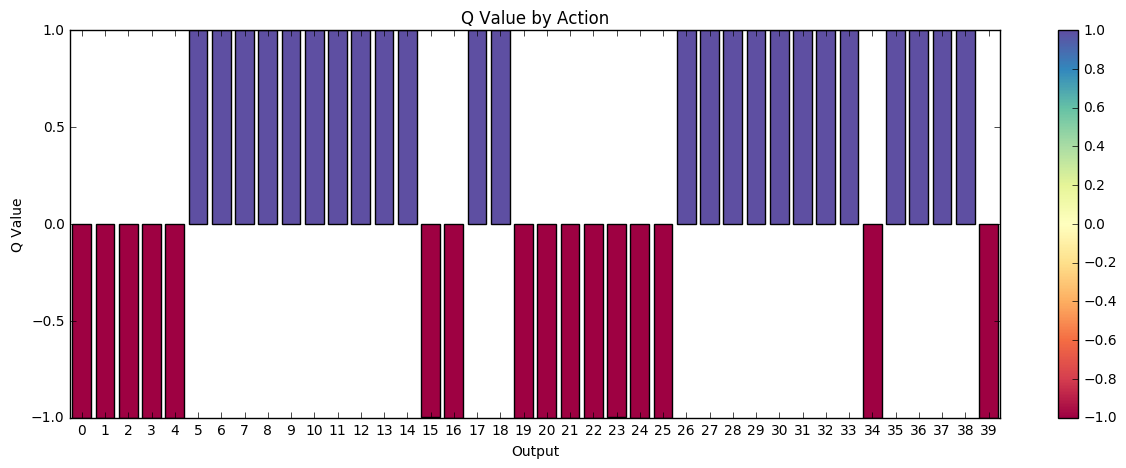

In [302]:
print(games[-5])
plot_qvals(q_vals[-5])